In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('spam.csv', encoding="latin1")

In [21]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5409,ham,There is a first time for everything :),NaN,NaN,NaN
2214,ham,Ok then i'll let him noe later n ask him call ...,NaN,NaN,NaN
5417,ham,Nope. I just forgot. Will show next week,NaN,NaN,NaN
1934,ham,Hope you are having a great day.,NaN,NaN,NaN
3913,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [31]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


In [33]:
df.describe()

,target
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [37]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [40]:
#info about duplicates
df.duplicated().sum()

np.int64(403)

In [48]:
df.drop_duplicates(keep='first',inplace=True)

In [49]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [50]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [51]:
df.shape

(5169, 2)

#EDA

In [53]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

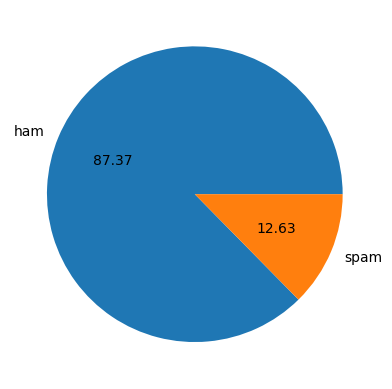

In [55]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

#now for better analysis we use  NLTK (Natural Language toolkit )
#also we to find how many alphabets in text ,how many words in text, how many sentence in text

In [57]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Collecting nltk
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import nltk

In [60]:
nltk.download('punkt') # some dependencies is needed by nltk to perform some function

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [69]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [64]:
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [75]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go until jurong point, crazy.., Available onl...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok lar..., Joking wif u oni...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,[Free entry in 2 a wkly comp to win FA Cup fin...,37
3,0,U dun say so early hor... U c already then say...,49,[U dun say so early hor... U c already then sa...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah I don't think he goes to usf, he lives ar...",15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,[This is the 2nd time we have tried 2 contact ...,35
5568,0,Will Ì_ b going to esplanade fr home?,37,[Will Ì_ b going to esplanade fr home?],9
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, * was in mood for that., So...any other...",15
5570,0,The guy did some bitching but I acted like i'd...,125,[The guy did some bitching but I acted like i'...,27


In [76]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [77]:
df

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15
5570,0,The guy did some bitching but I acted like i'd...,125,1,27


In [78]:
df[['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [79]:
#for ham messages
df[df['target']==0][['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [84]:
# for spam messages
df[df['target']==1][['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [81]:
df[df['target']==1]

,target,text,num_characters,num_sentences,num_words
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,4,39
8,1,WINNER!! As a valued network customer you have...,158,5,32
9,1,Had your mobile 11 months or more? U R entitle...,154,3,31
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,3,31
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,3,18
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,6,38
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,5,35
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,1,30


In [88]:
import seaborn as sns

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18240\4152678768.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


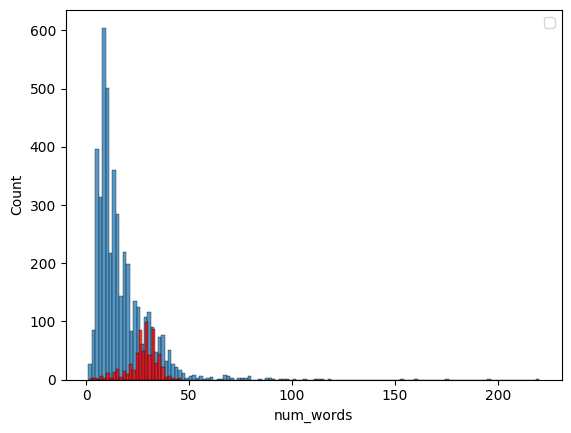

In [96]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


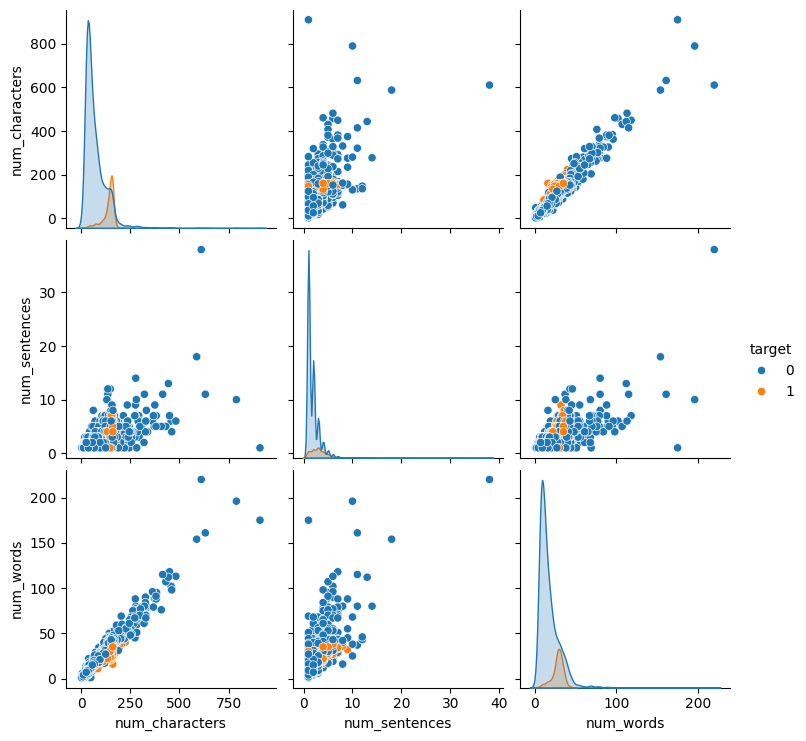

In [98]:
sns.pairplot(df,hue='target')

In [112]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [119]:
#used to do stemming like loving->love and dancing->danc last stage of data cleaning 
#come into basics of NLP
from nltk.stem.porter import PorterStemmer 

In [124]:
def transform_text(text):
    text = text.lower()  #lower the words
    
    text = nltk.word_tokenize(text) #tokennize the text
    # print(text)

    y=[]
    for i in text:
        if i.isalnum():     #take only alpha numeric words remove special character from it
            y.append(i)
    text = y[:]
    y.clear()

    pr =PorterStemmer()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #remove stopwords and punctuations from it
            y.append(pr.stem(i))

    return " ".join(y)

In [125]:
import string
transform_text("Hi Sumit !hasle Are you dear")

'hi sumit hasl dear'

In [126]:
df['transform_text'] = df['text'].apply(transform_text)

In [145]:
#now lets build wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=6,background_color='black')

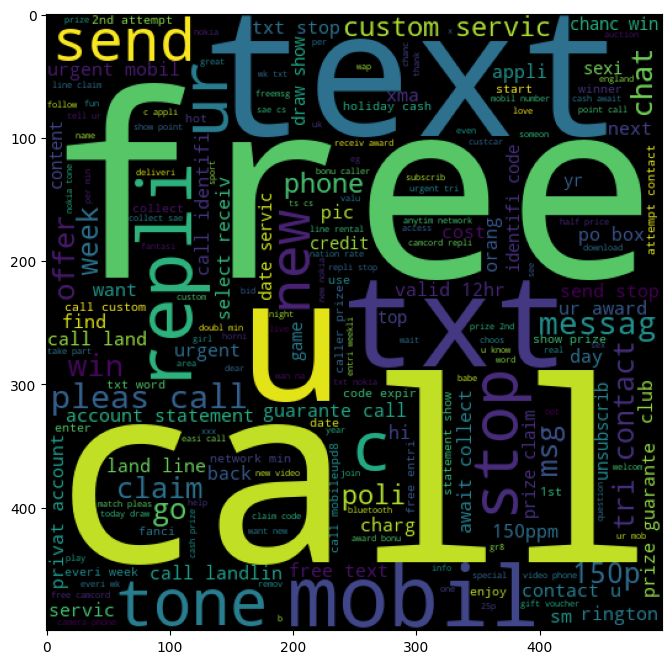

In [146]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

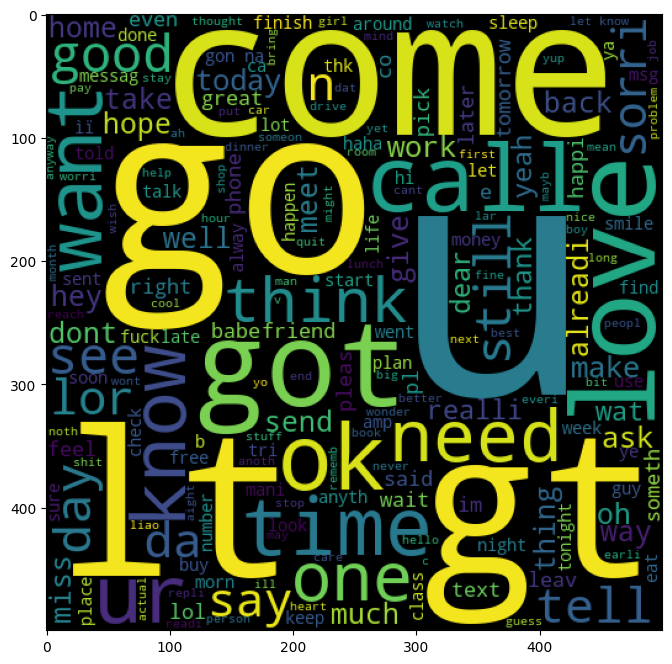

In [147]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [153]:
#Most common top 30 words we have to find in spam messages
spam_words = []

for sen in df[df['target']==1]['transform_text']:
    for word in sen.split():
        spam_words.append(word)

In [174]:
from collections import Counter
top_20_spam_words = Counter(spam_words).most_common(20)

<Axes: ylabel='0'>

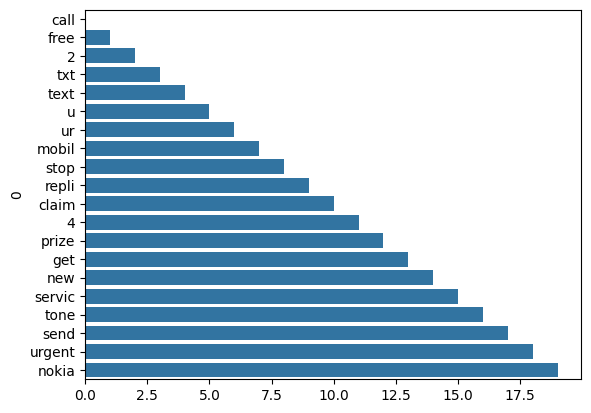

In [181]:
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(20))[0])

MODEL BUILDING

In [182]:
#first Text vectorization 
#Using bag of words
df

,target,text,num_characters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,1,27,guy bitch act like interest buy someth els nex...


In [210]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [211]:
X = tfid.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 3000)

In [222]:
# NEWLY ADDED
##after writing 1st note that if we scale our X values bw 0-1 may be it gives more accuracy 
# lets see using min-max scaler we also use standardscaler but not this time because it also gives negative values
## and naive bayes not take begative values
from sklearn.preprocessing import MinMaxScaler
                    # scaler =  MinMaxScaler()
                    # X = scaler.fit_transform(X)

## but after using this we don't get any such benefit although our precision of NB also come down to 0.97  so not any use

In [212]:
Y = df['target'].values

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [215]:
#import models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [216]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [217]:
gnb.fit(X_train,Y_train)
predict1 = gnb.predict(X_test)
print(accuracy_score(Y_test,predict1))
print(confusion_matrix(Y_test,predict1))
print(precision_score(Y_test,predict1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [218]:
mnb.fit(X_train,Y_train)
predict2 = mnb.predict(X_test)
print(accuracy_score(Y_test,predict2))
print(confusion_matrix(Y_test,predict2))
print(precision_score(Y_test,predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [219]:
bnb.fit(X_train,Y_train)
predict3 = bnb.predict(X_test)
print(accuracy_score(Y_test,predict3))                # currently bernaoulli is predictly best among all 3 naive bayes models
print(confusion_matrix(Y_test,predict3))              # we mostly check precision_score and less accuarcy because data is very imbalance
print(precision_score(Y_test,predict))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [220]:
"""Note:
As you see in confusion matrix out FP is high for that we have to consider precision score more
and when we use tfidvectorizer for that our MNB model gives 1 precision score which is best for now
"""

'Note:\nAs you see in confusion matrix out FP is high for that we have to consider precision score more\nand when we use tfidvectorizer for that our mnb model gives 1 precision score which is best for now\n'

In [223]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))